# SUMMARY: Empirical Asset Pricing via Machine Learning

시장과 개별 주식의 risk premium을 측정하는 머신러닝 방법의 예측 정확성을 위한 벤치마크 세트 제공  
- neural network를 활용하여 S&P 500 포트폴리오 전략은 buy-and-hold 전략보다 효율적(Sharpe ratio: 0.71 > 0.51)  
- neural network를 기반으로 포지션을 취하는 value-weighted long-short decile spread 전략은 샤프비율 1.35 
- 가장 유익한 예측 변수를 식별함으로써 어려운 risk premium 측정 문제 해결에 도움을 줌.  

※ Machine Learning 정의  
a. 통계적 예측을 위한 다양한 고차원 모델 모음  
b. 모델 선택 및 오버피팅 완화를 위한 정규화 방법  
c. 수많은 잠재적 모델 중 효율적인 알고리즘을 설명  

→ Empirical Asset Pricing의 여러 측면은 머신러닝 방법으로 분석하기에 매력적인 분야  

- 변수들이 선형적으로 영향을 미쳐야 하는지 비선형으로 영향을 미쳐야 하는지, 비선형이라면 어떤 형태의 비선형성을 고려해야 하는지에 대한 문제 → 머신러닝 기법 활용이 효율적(다양성, 복잡한 관계 근사, Overfitting 방지)  

- 머신러닝은 시장 타이밍, 포트폴리오 선택 및 위험 관리와 같은 실질적인 투자 문제를 해결하는 데 도움이 됨.   

900개 이상의 예측 변수 세트를 적용했을 때 OLS의 $R^2$이 하락함. → OLS는 많은 데이터셋에서 불안정한 예측값 산출  

OLS의 문제를 해결하는 대안으로 PCR, PLS가 있음.($R^2$을 0.26, 0.27로 증가시킴)  

비선형성을 허용하면 예측률이 향상됨. neural network를 활용하여 $R^2$을 0.33~0.4까지 올릴 수 잇음.  

※ 벤치마크 세가지 특성(size, book-to-market, momemtum)을 반영하여 S&P500 포트폴리오 수익에 대한 바텀업 예측 

1. OLS $R^2$: -0.22  
2. generalized linear model $R^2$: 0.71  
3. Trees and neural network $R^2$: 1.08 ~ 1.8  

가장 성공적인 예측 변수: 가격 추세(momentum, short-term rversal), 유동성(market value, dollar volume), 변동성(return volatility)  

머신러닝은 근본적으로 risk premium 측정 문제를 개선할 수 있는 큰 잠재력을 가지고 있음.  
→ 조건부 기댓값 $E(r_{i,t+1}\vert F_t)$을 가장 잘 근사하는 것  


## 1. Methodology  

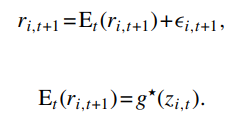


※ Hyperparameter tuning
- 모델의 복잡도를 제어하는 중요한 요소로, 모델 성능에 큰 영향을 미침  
- 일반적으로 데이터를 세 개의 비연속적 시간 구간(Training Sample, Validation Sample, Testing Sample)으로 나누어 튜닝 파라미터를 선택하는 방식으로 접근  
→ Training, Validation은 하이퍼파라미터 튜닝에 사용되지만 Testing은 튜닝에 사용되지 않으며 예측 성능을 평가하는 데 사용  







1. simple linear model  
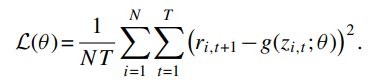

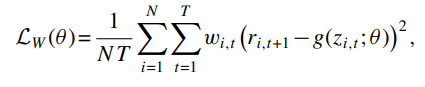
- 기존보다 예측 성능 향상  


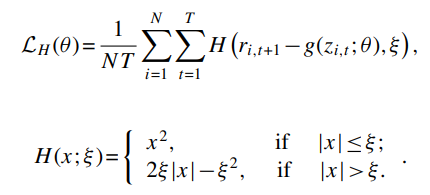
- 극단적인 관측값이 있을 때 OLS보다 더 안정적인 예측 가능



※ Penalized linear
- 단순 선형 모델은 많은 예측 변수가 있을 때 예측 실패 가능성이 큼.(Overfitting)  
→ Overfitting을 방지하기 위해 모델의 성능을 일부러 약화시키는 정규화 활용  

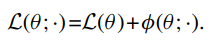

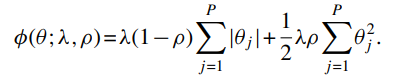

※ PCR 절차
1. 주성분 분석(PCA)에서 회귀변수를 예측 변수들 사이에서 공분산 구조를 가장 잘 보존하는 작은 선형 조합 세트로 결합  
2. 주성분을 사용하여 종속 변수에 대한 예측 모델 생성  
→ 낮은 분산 구성 요소 계수를 제로화하여 예측 문제 정규화  

단점: 궁극적인 통계적 목표를 통합하지 못함. PCA는 데이터의 분산을 최대화하는 방향으로 주성분을 선택하지만 회귀 분석의 궁극적인 목표는 종속 변수에 대한 예측 정확도를 최대화하는 것.  

- PCR과 PLS의 구현은 벡터화된 버전에서 시작  
$R = Z \theta + E$  
($R:NT \times 1, Z: NT \times P, E: NT \times 1$)  

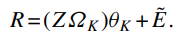  
($\Omega: P \times K$)  


PCR  
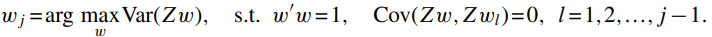

PLS  
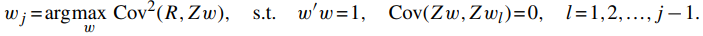  


※ Generalized linear  
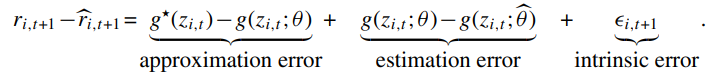  
- intrinsic error는 
- Estimation error는 
- Approximation error  


시리즈 확장은 모델 매개변수의 수를 빠르게 곱하기 때문에 자유도를 제어하기 위해 패널티 적용 → Group lasso  
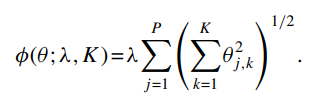  
 


※ Boosted regression trees and random forests  
- regression trees는 다중 방향 예측 변수 상호작용을 통합하기 위한 인기있는 머신러닝 접근 방식 
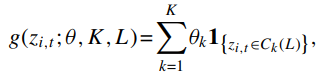  
K:잎  
L:깊이  
T:나무  

Tree모델의 장점: 예측 변수의 단조 변환에 대해 불변성을 유지하며, 범주형 데이터와 수치형 데이터를 동시에 처리할 수 있고, 비선형성을 근사하며, 트리의 깊이가 깊어질수록 더 복잡한 변수 간 상호작용을 모델링할 수 있음  

단점: Overfit되기 쉬운 예측 방법 중 하나이기 때문에 regularization이 강하게 적용되어야 함.  

※ Neural networks  
- 복잡한 머신러닝 문제를 풀 때 선호되는 접근 방식  
- 복잡성 때문에 해석하기 어렵고 고도로 매개변수화된 머신러닝 도구 중 하나  

이 연구에서는 기존의 'feed-foward'에 초점을 맞춤. 
- input layer  
- hidden layer  
- output layer  
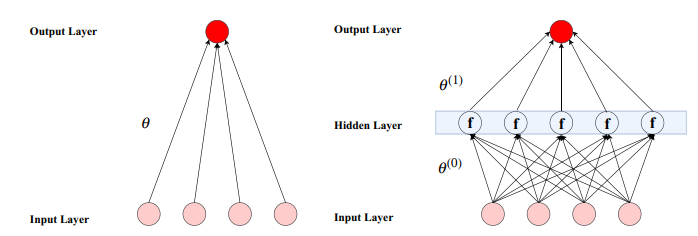  
위 그림에서 오른쪽 패널은 5개의 뉴런을 포함하는 하나의 hidden layer를 가진 예시를 나타냄. 각 뉴런은 왼쪽의 단순 네트워크에서와 마찬가지로 모든 입력 단위에서 선형적으로 정보를 끌어옴. 그런 다음 각 뉴런에서 다음 레이어로 출력을 보내기 전에 집계된 신호에 비선형함수 형태인 '활성화 함수' f를 적용. 마지막으로는 각 뉴런의 결과가 선형적으로 합산되어 최종 출력 예측이 이루어짐.  


최대 5개의 Hidden layer가 있는 아키텍쳐를 고려  
1. 32개의 뉴런으로 구성된 단일 hidden layer  
2. 32개와 16개의 뉴런으로 구성된 2개의 hidden layer  
3. ...   
4. ... 
5. 32,16,8,4,2개의 뉴런으로 구성된 5개의 hidden layer  

- 비선형 함수는 최근 연구들에서 널리 사용되는 함수 형태인 ReLU 선택  



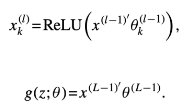  
$x_k^{(l)}$: l번째 층에서 k번째 뉴런의 출력 값  
입력값이 0보다 크면 그 값을 그대로 반환하고 0보다 작으면 0을 반환  

신경망 VS 트리 모델  
- 'greedy'최적화가 필요한 트리 기반 알고리즘과는 달리 신경망을 훈련하면 원칙적으로 최적화의 각 단계에서 모든 모델 파라미터를 공동으로 업데이트할 수 있으므로 트리에 비해 상당한 이점을 누릴 수 있음.  
- 그러나 신경망의 높은 비선형성, non-convex한 성질, 매우 많은 매개변수화는 실행이 불가능해질 정도로 계산 집약적으로 만듦.  
→ 일반적으로 해를 찾을 때 확률적 경사 하강(SGD)를 사용하여 신경망을 학습시키는데 이는 최적화 루틴의 가속화를 도와주는 반면 정확도가 낮아짐.  

따라서 신경망의 regularization에는 더 많은 주의가 필요  
- 학습률 축소(learning rate shrinkage)  → SGD의 학습 속도를 제어
- 조기 중지(early stopping)  
- 일괄 정규화(batch normalization)  
- 앙상블(ensemble) → 신경망 학습
등 다른 기법을 동시에 사용하여 최적화 진행  


※ Performance evaluation  
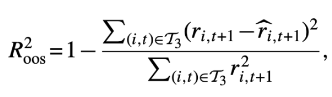  
여기서 $T_3$는 테스트 데이터셋에 대해서만 적합도가 평가됨  



방법론들을 짝을 지어 비교하기 위해 두 모델의 OOS 예측 정확도 차이에 대해 Diebold-Mariano 테스트 진행  
Diebold-Mariano 테스트  
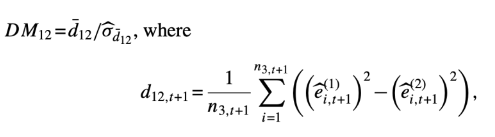  


## 2. An Empirical Study of U.S. Equities  
NYSE, AMEX, NASDAQ에 상장된 모든 기업의 개별 주식 수익률을 CRSP로부터 얻고 무위험 수익률은 국채 금리로 계산.  
가격과 종목코드에 관계없이 최대한 큰 주식 pool을 선택.  

Welch and Goyal 연구에서의 변수 정의에 따라 dividend-price 비율, earnings-price-ratio, book-to-market, net equity expansion, T-bill rate, term spread, default spread, stock variance등 8가지 거시경제 예측 지수를 구성  

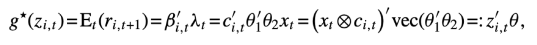  




※ The cross-section of individual stocks  
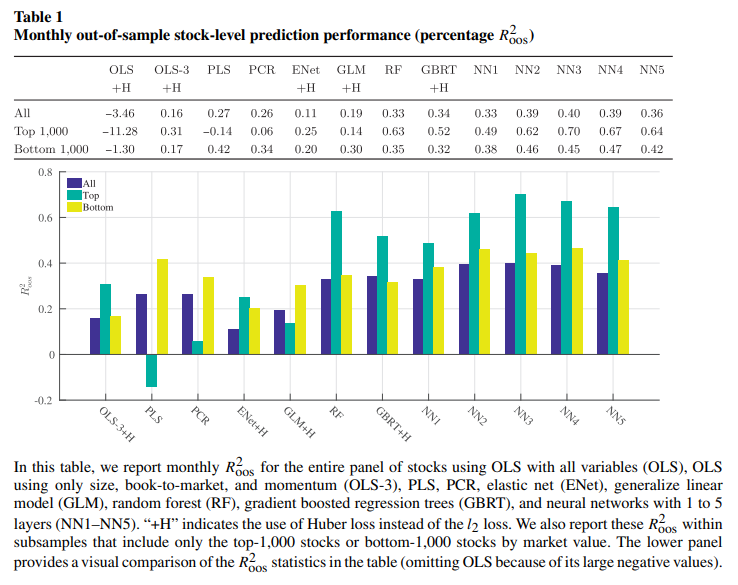  
- 부스트 트리와 랜덤 포레스트는 각각 0.34, 0.33의 적합도를 생성하며 PCR과 대등함.  
- 가장 성능이 좋은 비선형 방법은 neural network. NN3의 경우 0.4로 최고치 기록 
→ NN4, NN5모델이 더 개선되지 않는 것을 보아 학습의 이점이 제한적이라는 것을 보여줌  
- 소형주 뿐만 아니라 대형주에서도 머신러닝 기법들이 높은 예측 성능을 보이고 있음.  → 머신러닝 모델이 단순히 소형주의 유동성 부족으로 인한 비효율성만을 반영하는 것이 아니라는 것을 증명  




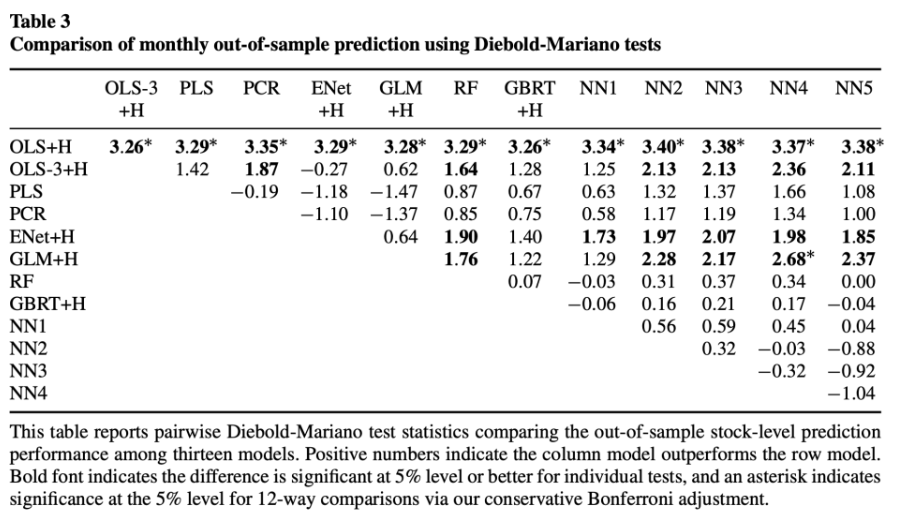
$\alpha = 0.05$  
- 기본적인 선형 회귀 모델보다 다른 모델들이 더 좋은 성능을 지님.   



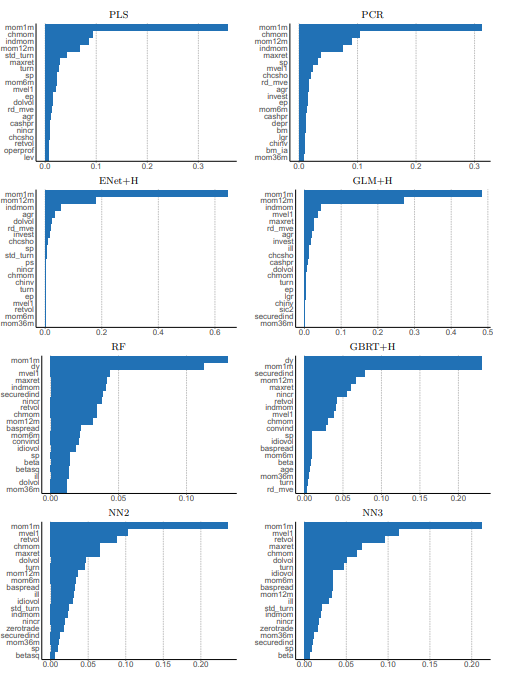  
- 중요도 측정을 사용하여 각 모델별로 예측 변수의 상대적 중요도 평가  
- 각 predictor 모든 값을 0으로 설정했을 때의 R^2값의 감소를 계산하고 이를 각 predictor에 대한 단일 중요도 측정값으로 평균  
- 모델 내 변수 중요도의 총합은 1  

가장 영향력 있는 변수  
1. 가격 추세(모멘텀, 최근 최대 수익률)  
2. 유동성(로그시가총액, 거래대금)  
3. 변동성(베타 제곱, 시장 베타)  
4. PER, PSR 등  

- SSD로 측정한 결과도 위와 비슷한 결과가 도출되었음

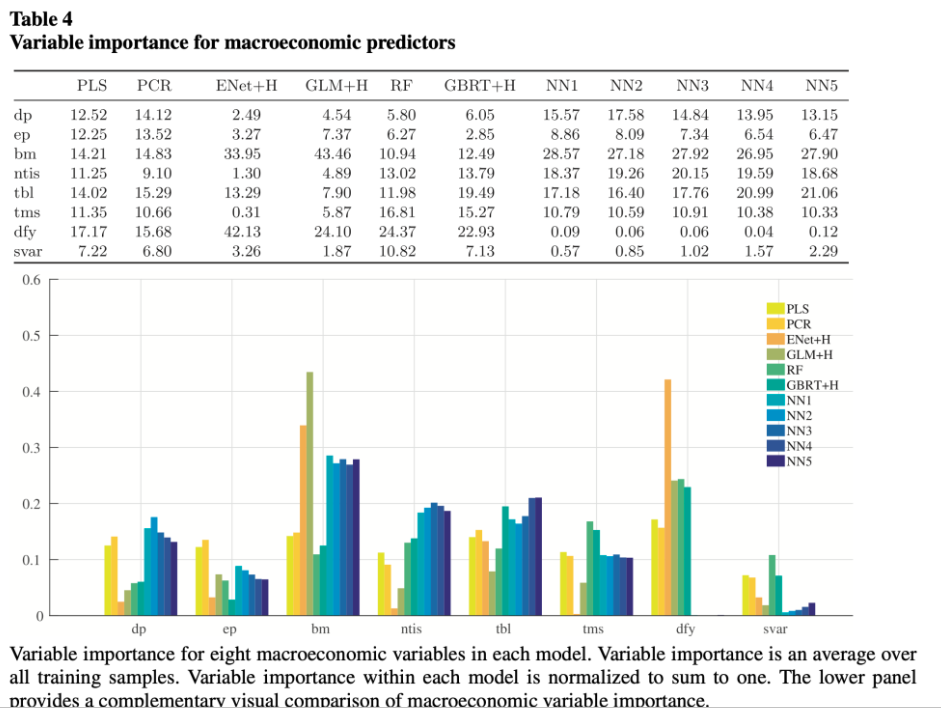  
- PLS와 PCR은 다른 모델에 비해 전체적으로 비중을 비슷하게 두었음(변수 간 상관관계가 높기 때문)  
- 비선형 방법은 선형 방법에 비해 term spread의 비중이 높음 (선형 모델에서는 term spread 변수가 무시됨)   





※ Portfolio forecasts  

- 개별 주식 수익률이 아닌 포트폴리오의 총 수익률 예측 성능 비교  
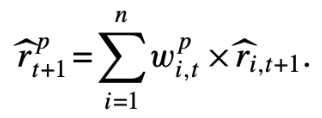  
- 실증분석 금융 연구에서 가장 많이 쓰이는 30개의 포트폴리오(S&P500, Fama French-size, value, momentum 등)  
- Fama-French 포트폴리오의 하위 구성 요소는 바텀업 예측 기반  



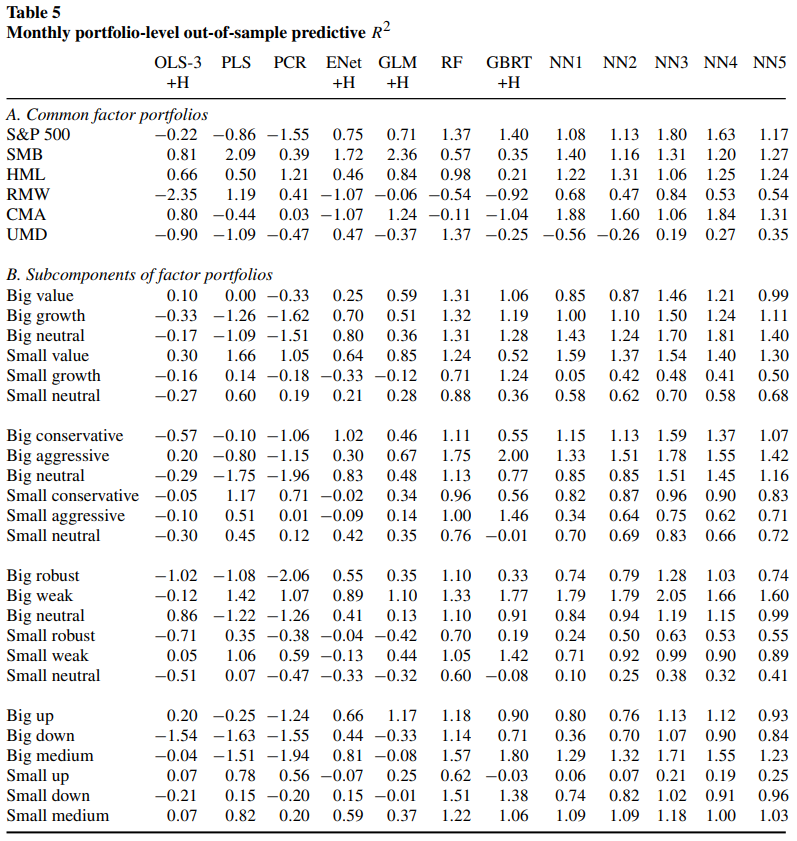  
- 선형회귀분석은 대부분의 변수가 양의 R^2을 만들어내지 못함.  
- 비선형 모델이 확실하게 더 좋은 예측 성능을 보임  
- 선형 모델은 바텀업 포트폴리오 수익률 예측에 대해 전반적으로 신뢰성이 떨어지지만 Small보다는 Big에서 더 나은 경향을 보임

$SR^* = \sqrt{\frac{SR^2 + R^2}{1 - R^2}}$
- 위 공식을 활용하여 포트폴리오 타이밍을 위해 머신러닝 예측을 활용하는 투자자의 연간 샤프비율 개선치 $SR^* - SR$를 구할 수 있음  
- 다른 결과와 마찬가지로 비선형 모델을 기반으로 한 전략이 가장 좋은 성능을 보임.전반적으로 neural network가 우수   

※ Machine Learning Portfolios  
- 이미 지정된 포트폴리오의 수익률 예측이 아닌 머신러닝을 통해 새로운 포트폴리오 생성  
- 기대수익률이 가장 높은 주식 9개 매수 & 가장 낮은 주식 1개 매도 포트폴리오 구성  
- value-weighted 방식을 사용하여 매월 포트폴리오 리밸런싱  
- neural network 포트폴리오는 다른 대안들보다 샤프비율이 높을 뿐만 아니라 특히 equal-weight 포트폴리오의 경우에 상대적으로 하락폭이 작았음  


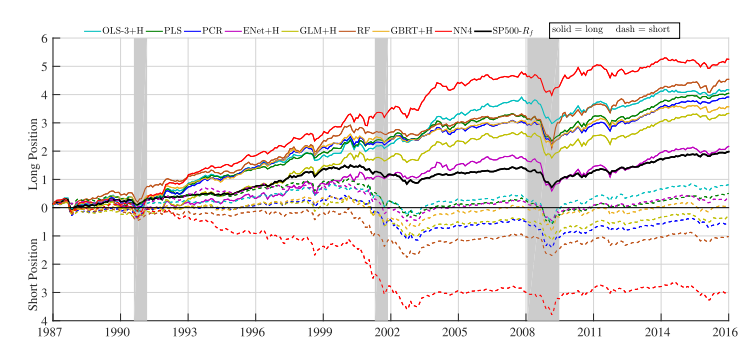  

- 위 결과를 바탕으로 모든 머신러닝 포트폴리오 예측을 결합하는 두가지 전략 구성  
1. 11개의 머신러닝 방법의 롱숏 포트폴리오를 동일한 가중치로 단순 평균  → equal-weighted 샤프 비율: 2.49, $R^2$:0.43 으로 단일 방법보다 높은 수치 기록  
2. 해당 검증 샘플 동안 각 1년 테스트 샘플에 가장 적합한 머신러닝 모델을 선택하여 로테이션 구성  
→ 30년간 NN3 11회, NN1 7회, GBRT 6회, NN2 5회, NN4 1회 선택. $R^2$은 가장 높지만 독립형 NN-4모델보다 샤프비율은 낮음  

## 결론  

1. 머신러닝의 유용성:
- 머신러닝 방법이 자산 가격에 대한 경험적 이해를 개선하는 데 도움이 된다  
- 신경망과 회귀 나무(regression trees)는 가장 성능이 좋은 방법들이며, 특히 신경망이 뛰어남  


2. shallow learning vs. deep learning:  
- shallow learning이 deep learning보다 더 나은 성과를 보였음  

3. 머신러닝의 가치:  
- 기계 학습 방법은 더 큰 규모와 유동성이 높은 주식 수익률과 포트폴리오를 예측하는 데 가장 유용  


4. 경제적 모델링과 실용적 측면:

- 머신러닝 알고리즘의 성공은 경제적 모델링과 포트폴리오 선택의 실용적 측면 모두에 희망을 준다.  
- 기계 학습을 통한 더 나은 측정을 통해 리스크 프리미엄이 추정 오류와 근사치에 덜 얽매이게 된다.  
- 따라서 자산 가격 현상의 신뢰할 만한 경제적 메커니즘을 식별하는 과제가 덜 어려워진다.
